In [2]:
# import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import linear_model 
from sklearn import preprocessing 
from sklearn import metrics

In [3]:
# set random seed 
np.random.seed(24)
# generate random data 
num_samples = 100 
feature_1 = np.random.uniform(-10, 10, num_samples) 
feature_2 = np.random.uniform(-10, 10, num_samples)

In [4]:
# Generate target variable based on a polynomial relationship with some added noise target
target = 0.5*feature_1**2 + 2 * feature_1*feature_2 - 3*feature_2 + 5 + np.random.normal(0, 5, num_samples)

# Combine into a DataFrame 
data_regression = pd.DataFrame({ 
    'Feature_1': feature_1, 
    'Feature_2': feature_2, 
    'Target': target 
    }) 

data_regression.head()

,Feature_1,Feature_2,Target
0,9.200346,5.383252,133.469543
1,3.990241,-0.508315,8.605029
2,9.997346,0.382263,56.362719
3,-5.598654,8.883861,-112.909787
4,-2.778873,2.870507,-20.687807


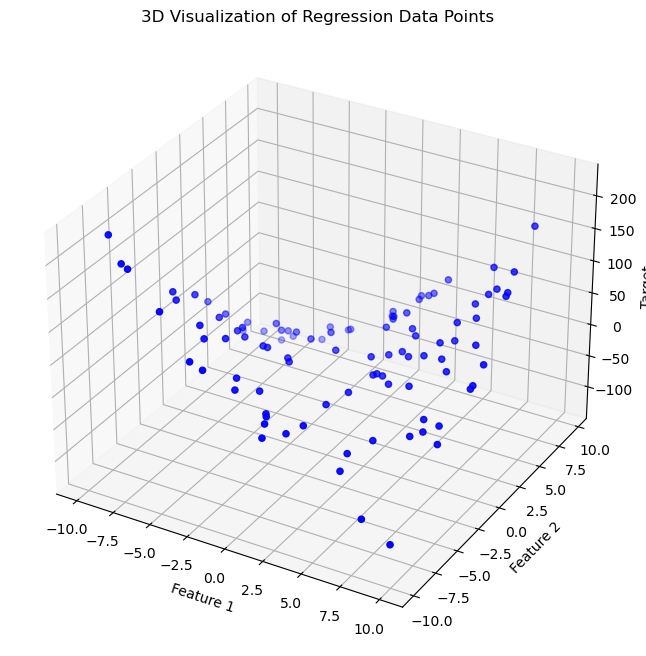

In [5]:
# Visualizing the dataset in a 3D scatter plot since we have two features and one target
fig = plt.figure(figsize=(10, 8)) 
ax = fig.add_subplot(111, projection='3d')
# Scatter plot of the features and target
ax.scatter(data_regression['Feature_1'], data_regression['Feature_2'], data_regression['Target'], c='blue', marker='o')
ax.set_xlabel('Feature 1') 
ax.set_ylabel('Feature 2') 
ax.set_zlabel('Target') 
plt.title('3D Visualization of Regression Data Points') 
plt.show()

## Why predicting y is a supervised learning problem?

Answer: Because, here input features (Feature 1 & 2) value are given and their corresponding target value also set.

## Which Axis represents the label?   

Answer: From graph 'Target' is representing the label which is a Z-axis. 

## Is this a classification or regression problem? Why?

Answer: It's a regression problem becuase you can't get the discrete categories or classes value from here which is needed for classification.

## How many samples are in the dataset?

Answer: As we declared a variable named 'num_samples' with an assigned value of 100 for creating features, that's why there are 100 samples in this dataset. 

In [6]:
# split the data into training and testing sets with 80% training and 20% testing
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
#train_x, test_x, train_y, test_y = train_test_split(data_regression.drop('Target', axis=1), data_regression['Target'], test_size=0.2, random_state=24)
train_data, test_data = train_test_split(data_regression, test_size=0.2, random_state=24)   
train_x = train_data.drop('Target', axis=1) # Features: 'Feature 1 & 2'
train_y = train_data['Target']

test_x = test_data.drop('Target', axis=1) # Features: 'Feature 1 & 2'
test_y = test_data['Target']

In [7]:
# Add a linear regression model 
model = linear_model.LinearRegression() 
model.fit(train_x, train_y)

LinearRegression()

## What is the hypothesis in this model?

Answer: The hypothesis in this model is the target output, y which is a linear combination of the features (Feature 1 & Feature 2)

## Identify the cost function in your model? What does a cost function do in a Linear Regression model?

Ansewer: Here, the cost function is the Mean Squared Error(MSE), which is also most commonly used cost function for a linear regression and it represents how closely predictions match with the actual outcomes.
The purpose for using a cost function to find the error, or difference between predicted and actual outcome. By reducing these errors during training, it leads the optimization process and helps in the model's training.

## What do the coefficients in a linear regression model represent? How does their interpretation change in a polynomial regression model?

Answer: Generally, in a linear regression model, coefficients show the rate of change in the target variable for each unit change in the related feature by keeping other features fixed. On the other hand, in polynomial regression, the interpretation changes because the equation comes with degree and it's more complex rether then linear regression.

In [8]:
# print the intercept and coefficients 
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 23.71082134792195
Coefficients: 
 [ 1.02446487 -4.11103097]


In [10]:
from sklearn.metrics import r2_score
# make the predictions 
predictions = model.predict(test_x)
R = r2_score(test_y , predictions)
print ("R² :",R)
print('Predictions: \n', predictions)
print('Mean Absolute Error: \n', metrics.mean_absolute_error(test_y, predictions))
print('Mean Squared Error: \n', metrics.mean_squared_error(test_y, predictions))
print('Root Mean Squared Error: \n', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

R² : -0.03885413131056925
Predictions: 
 [ 26.30222786  35.18189199  -8.39631087  -6.95258838  50.24308795
  56.43965447 -19.40569586  23.74485538  12.09249493  26.77347618
  43.68842351  39.10215249   5.27664612   6.11020097  17.0408721
  29.41385903  18.31130919  22.65538756  68.82524437  31.20755774]
Mean Absolute Error: 
 45.90025067110714
Mean Squared Error: 
 3508.0155013454323
Root Mean Squared Error: 
 59.22850244050944


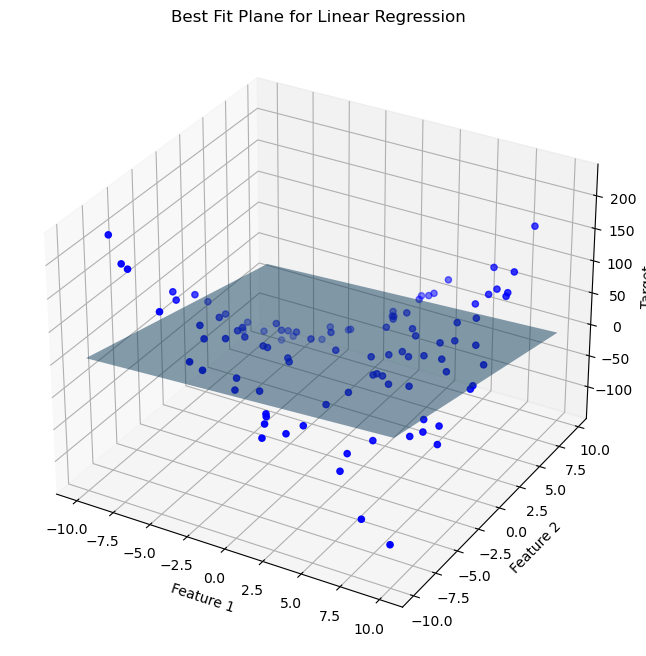

In [11]:
# plot the best fit line 

# Create a meshgrid for Feature_1 and Feature_2
feature1_range = np.linspace(data_regression['Feature_1'].min(), data_regression['Feature_1'].max(), 100)
feature2_range = np.linspace(data_regression['Feature_2'].min(), data_regression['Feature_2'].max(), 100)
feature1_grid, feature2_grid = np.meshgrid(feature1_range, feature2_range)

# Calculate target values for the best-fit plane

# Plot the dataset and the best-fit plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
ax.scatter(data_regression['Feature_1'], data_regression['Feature_2'], data_regression['Target'], c='blue', marker='o')

# Creating a grid for plane
x = np.linspace(data_regression['Feature_1'].min(), data_regression['Feature_1'].max(), 10)
y = np.linspace(data_regression['Feature_2'].min(), data_regression['Feature_2'].max(), 10)
x, y = np.meshgrid(x, y)
z = model.intercept_ + model.coef_[0] * x + model.coef_[1] * y

# Plot the best-fit plane
ax.plot_surface(x, y, z, alpha=0.5, rstride=100, cstride=100)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title('Best Fit Plane for Linear Regression')
plt.show()